In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize


In [ ]:
iris = load_iris()
X = iris.data
y = iris.target


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [ ]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Results:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("Recall   :", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score :", f1_score(y_test, y_pred, average='macro'))


In [ ]:
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")



Logistic Regression Results:
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0

Random Forest Results:
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0


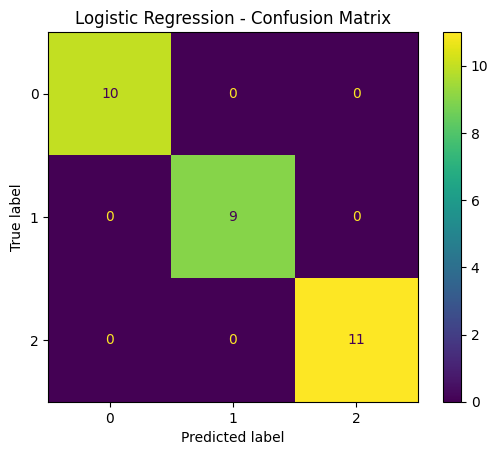

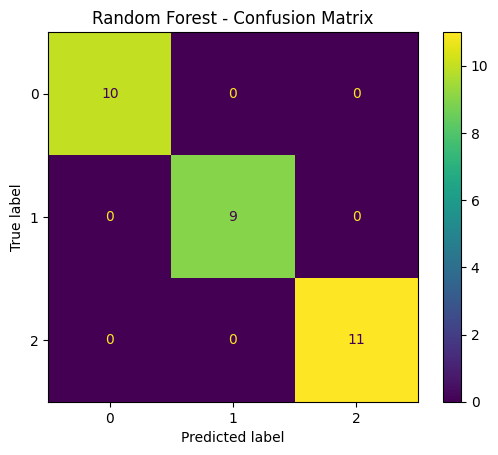

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Random Forest - Confusion Matrix")
plt.show()


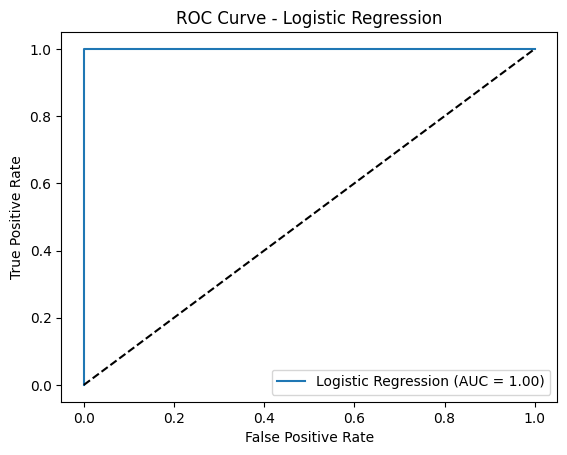

In [ ]:
# Binarize output for ROC
y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1]

# Logistic Regression ROC
y_score_lr = lr.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score_lr.ravel())
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()
